<DIV ALIGN=CENTER>

# Introduction to Text Mining, Part II
## Professor Robert J. Brunner
  
</DIV>  
-----
-----


## Introduction

In this IPython Notebook, we continue the text mining work to include more advanced concepts.



### Initialize Notebook
We first repopulate this notebook with data and info.

In [1]:
# load dataset
from sklearn.datasets import fetch_20newsgroups
train = fetch_20newsgroups(subset='train', shuffle=True, random_state=23)
test = fetch_20newsgroups(subset='test', shuffle=True, random_state=23)

In [2]:
from sklearn.feature_extraction.text import CountVectorizer

# Verify attributes

cv = CountVectorizer(stop_words = 'english', ngram_range=(1,2), max_features=100000)
train_counts = cv.fit_transform(train['data'])
test_data = cv.transform(test['data'])


In [3]:
%matplotlib inline

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white", context='paper', font='monospace')

# Convenience function to plot confusion matrix

# This method produces a colored heatmap that displays the relationship
# between predicted and actual types from a machine leanring method.

def confusion(test, predict, title):

    f, ax = plt.subplots(figsize=(12, 8))

    # Make a 2D histogram from the test and result arrays
    pts, xe, ye = np.histogram2d(test, predict, bins=20)

    # For simplicity we create a new DataFrame
    pd_pts = pd.DataFrame(pts.astype(int))
    
    # Display heatmap and add decorations
    hm = sns.heatmap(pd_pts, annot=True, fmt="d")
    hm.axes.set_title(title)
    
    return None

## Document Classification

We now look at different classification techniques.

### SGD Classifier


In [4]:
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier().fit(train_counts, train['target'])
predicted = clf.predict(test_data)

print("SVM prediction accuracy = {0:5.1f}%".format(100.0 * clf.score(test_data, test['target'])))

# Can verify with following code
# np.mean(predicted == test['target'])   


SVM prediction accuracy =  76.7%


In [5]:
from sklearn import metrics

print(metrics.classification_report(test['target'], predicted,
    target_names = test['target_names']))

                          precision    recall  f1-score   support

             alt.atheism       0.77      0.72      0.74       319
           comp.graphics       0.71      0.69      0.70       389
 comp.os.ms-windows.misc       0.72      0.55      0.62       394
comp.sys.ibm.pc.hardware       0.59      0.64      0.61       392
   comp.sys.mac.hardware       0.65      0.81      0.72       385
          comp.windows.x       0.77      0.71      0.74       395
            misc.forsale       0.72      0.82      0.77       390
               rec.autos       0.83      0.80      0.81       396
         rec.motorcycles       0.79      0.93      0.86       398
      rec.sport.baseball       0.89      0.83      0.86       397
        rec.sport.hockey       0.89      0.92      0.90       399
               sci.crypt       0.92      0.82      0.87       396
         sci.electronics       0.67      0.72      0.69       393
                 sci.med       0.87      0.72      0.79       396
         

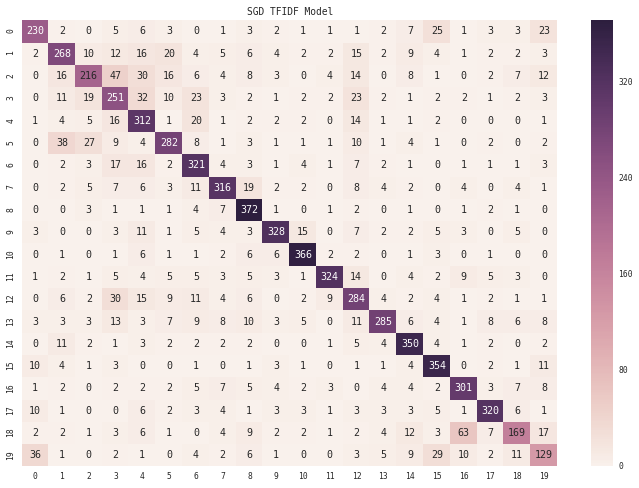

In [6]:
confusion(test['target'], predicted, 'SGD TFIDF Model')

### SVM

In [7]:
# Next lets try Linear SVM
from sklearn import svm

# Lets build our model and train it all at once

clf = svm.LinearSVC(C=1000).fit(train_counts, train['target'])

predicted = clf.predict(test_data)

In [8]:
print("SVM prediction accuracy = {0:5.1f}%".format(100.0 * clf.score(test_data, test['target'])))

SVM prediction accuracy =  80.1%


In [ ]:
print(metrics.classification_report(test['target'], predicted,
    target_names = test['target_names']))

In [ ]:
confusion(test['target'], predicted, 'SVC Linear Model')

### Logistic Regression


In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(train_counts, train['target'])

predicted = clf.predict(test_data)

print("SVM prediction accuracy = {0:5.1f}%".format(100.0 * clf.score(test_data, test['target'])))

In [ ]:
confusion(test['target'], predicted, 'LR Model')

In [ ]:
clf = LogisticRegression(C = 1000, penalty='l1')
clf.fit(train_counts, train['target'])

print("LR-1 prediction accuracy = {0:5.1f}%".format(100.0 * clf.score(test_data, test['target'])))

# predicted = clf.predict(test_data)

In [ ]:
clf = LogisticRegression(C = 1000, penalty='l2')
clf.fit(train_counts, train['target'])

print("LR-2 prediction accuracy = {0:5.1f}%".format(100.0 * clf.score(test_data, test['target'])))

# predicted = clf.predict(test_data)

### TF IFD

use different classifier
TF IFD


In [15]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()
train_tfidf = tfidf_transformer.fit_transform(train_counts)
train_tfidf.shape

(11314, 100000)

In [16]:
clf = SGDClassifier().fit(train_tfidf, train['target'])

test_tfidf_data = tfidf_transformer.transform(test_data)

print("SGD TF-IDF prediction accuracy = {0:5.1f}%".format(100.0 * clf.score(test_tfidf_data, test['target'])))

predicted = clf.predict(test_tfidf_data)

SGD TF-IDF prediction accuracy =  85.2%


In [17]:
print(metrics.classification_report(test['target'], predicted,
    target_names = test['target_names']))

                          precision    recall  f1-score   support

             alt.atheism       0.84      0.78      0.81       319
           comp.graphics       0.77      0.77      0.77       389
 comp.os.ms-windows.misc       0.76      0.76      0.76       394
comp.sys.ibm.pc.hardware       0.73      0.73      0.73       392
   comp.sys.mac.hardware       0.81      0.86      0.84       385
          comp.windows.x       0.86      0.78      0.81       395
            misc.forsale       0.82      0.91      0.86       390
               rec.autos       0.92      0.90      0.91       396
         rec.motorcycles       0.95      0.95      0.95       398
      rec.sport.baseball       0.89      0.94      0.92       397
        rec.sport.hockey       0.94      0.98      0.96       399
               sci.crypt       0.92      0.95      0.93       396
         sci.electronics       0.82      0.75      0.78       393
                 sci.med       0.90      0.88      0.89       396
         

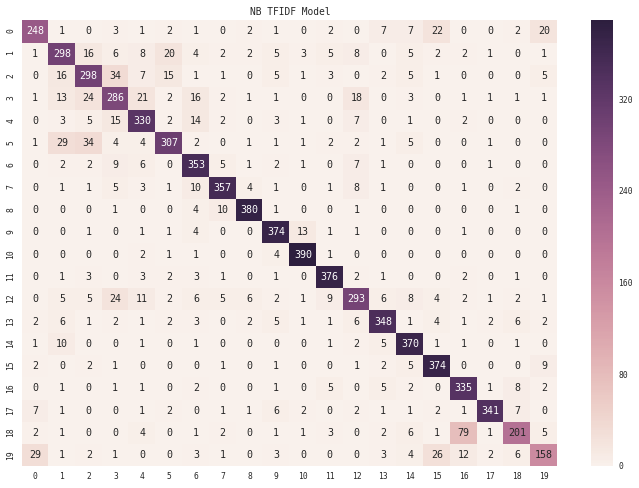

In [18]:
confusion(test['target'], predicted, 'NB TFIDF Model')

### Tweet Data Test

In [19]:
docs_new = [
    '''Are you an Entrepreneur at the University of Illinois in Champaign ? 
    If so, you will want to look at this. See=&gt; https://t.co/TVMxlEdo9d''',
    '''@YoureWelcomeCU highlights tech innovation from #ChampaignUrbana and much more:
    http://t.co/CXIbpNL3UH http://t.co/y3am3swGKU''',
    '''RT @LauraFrerichs: Tim Hassinger, CEO of @DowAgro at grand opening of new Innovation Lab
    @UIResearchPark "it's a special relationship" http…''',
    '''Join us on October 6 for Data Analytics After Hours: #networking event w/local companies
    http://t.co/fJfOa0U3tS http://t.co/23F0sDYhQN'''
]

new_counts = cv.transform(docs_new)

predicted = clf.predict(new_counts)

for doc, category in zip(docs_new, predicted):
    print('{0} \n=> {1}\n'.format(doc, train['target_names'][category]))

Are you an Entrepreneur at the University of Illinois in Champaign ? 
    If so, you will want to look at this. See=&gt; https://t.co/TVMxlEdo9d 
=> rec.autos

@YoureWelcomeCU highlights tech innovation from #ChampaignUrbana and much more:
    http://t.co/CXIbpNL3UH http://t.co/y3am3swGKU 
=> comp.sys.ibm.pc.hardware

RT @LauraFrerichs: Tim Hassinger, CEO of @DowAgro at grand opening of new Innovation Lab
    @UIResearchPark "it's a special relationship" http… 
=> rec.autos

Join us on October 6 for Data Analytics After Hours: #networking event w/local companies
    http://t.co/fJfOa0U3tS http://t.co/23F0sDYhQN 
=> sci.space



### Pipeline


In [20]:
from sklearn.pipeline import Pipeline

text_clf = Pipeline([('vect', CountVectorizer(stop_words = 'english')),
                     ('tfidf', TfidfTransformer()),
                     ('clf', SGDClassifier(loss='hinge', penalty='l2',
                                           alpha=1e-3, n_iter=5, random_state=23))])

In [21]:
text_clf = text_clf.fit(train['data'], train['target'])

In [22]:
predicted = text_clf.predict(test['data'])

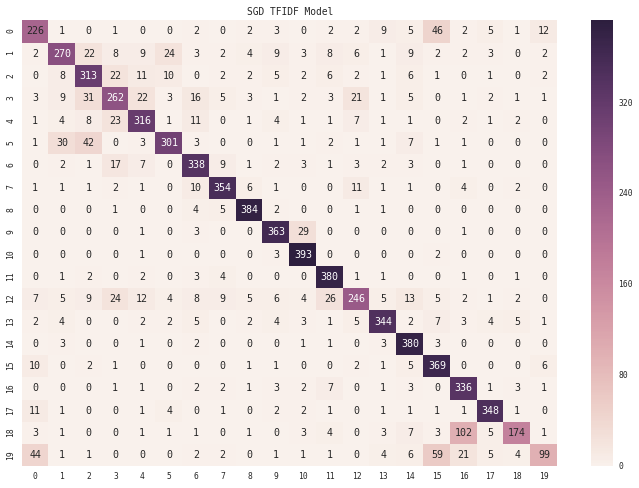

In [23]:
confusion(test['target'], predicted, 'SGD TFIDF Model')

### Tweet Data Test

In [24]:
# Classify tweets with new pipeline

predicted = text_clf.predict(docs_new)

for doc, category in zip(docs_new, predicted):
    print('{0} \n=> {1}\n'.format(doc, train['target_names'][category]))

Are you an Entrepreneur at the University of Illinois in Champaign ? 
    If so, you will want to look at this. See=&gt; https://t.co/TVMxlEdo9d 
=> rec.autos

@YoureWelcomeCU highlights tech innovation from #ChampaignUrbana and much more:
    http://t.co/CXIbpNL3UH http://t.co/y3am3swGKU 
=> comp.windows.x

RT @LauraFrerichs: Tim Hassinger, CEO of @DowAgro at grand opening of new Innovation Lab
    @UIResearchPark "it's a special relationship" http… 
=> talk.politics.mideast

Join us on October 6 for Data Analytics After Hours: #networking event w/local companies
    http://t.co/fJfOa0U3tS http://t.co/23F0sDYhQN 
=> comp.windows.x



### Clustering Analysis


In [25]:
from sklearn.cluster import KMeans

true_k = 20

km = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)

km.fit(test_data)

KMeans(copy_x=True, init='k-means++', max_iter=100, n_clusters=20, n_init=1,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [26]:
labels = test['target']

print("Top 10 tokens per cluster:")

order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = cv.get_feature_names()

for i in range(true_k):
    print("Cluster {0}:".format(i))
    for ind in order_centroids[i, :10]:
        print(' {0}'.format(terms[ind])
    print('\n')

SyntaxError: invalid syntax (<ipython-input-26-a352552e390b>, line 12)

### More advanced processing

NLTK
spacy


In [ ]:
from IPython.display import HTML
HTML('<iframe src=http://spacy.io/displacy/ width=800 height=600></iframe>')

-----
## Breakout Session

During this breakout, you should work to . Specific problems you can attempt include the
following:

1. Complete the code cells in this Notebook.

2. 

Additional, more advanced problems:

1. .

-----

### Additional References

-----

### Return to the [Week 4 Index](index.ipynb).

-----